In [ ]:
import pandas as pd



In [ ]:

# Load the two CSV files into pandas DataFrames
file1 = "books_data.csv"  # Replace with your first file name
file2 = "Books_rating.csv"  # Replace with your second file name

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Merge the two DataFrames on the 'Book Title' column
merged_df = pd.merge(df1, df2, on="Title", how="inner")  # Use 'left', 'right', or 'outer' if needed

# Save the merged DataFrame to a new CSV file
output_file = "merged_books.csv"
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved to {output_file}")

Merged file saved to merged_books.csv


In [7]:
data = pd.read_csv("merged_books.csv")

In [11]:
# reading in the merged data
import pandas as pd
data = pd.read_csv("merged_books.csv")

In [12]:
from fractions import Fraction
import numpy as np
books = data 
# Convert the 'review/helpfulness' column to decimals
books.loc[books.loc[:,'review/helpfulness']!='0/0','review/helpfulness'] = books.loc[books.loc[:,'review/helpfulness']!='0/0','review/helpfulness'].apply(lambda x: float(Fraction(x)))
books['review/helpfulness'] = pd.to_numeric(data['review/helpfulness'], errors='coerce')

In [13]:
# fixing the date column
def parse_partial_date(date_str):
    if pd.isna(date_str):
        return np.nan
    try:
        # Try to parse full date
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        try:
            # Try to parse year-month
            return pd.to_datetime(date_str, format='%Y-%m')
        except ValueError:
            try:
                # Try to parse just year
                return pd.to_datetime(date_str, format='%Y')
            except ValueError:
                return np.nan
books['parsedDate'] = books['publishedDate'].apply(parse_partial_date)

In [14]:
# Take a 1% random sample
sample_df = books.sample(frac=0.01, random_state=42)  # Set random_state for reproducibility

# Save the sample to a new CSV file
sample_df.to_csv("books_subset.csv", index=False)  # Replace with your desired output file name

print("Sample saved to 'books_subset.csv'")

Sample saved to 'books_subset.csv'


In [ ]:
sample_df = pd.read_csv("books_subset.csv")

In [14]:
books.loc[:,'parsedDate']

0         1996-01-01
1         2005-01-01
2         2005-01-01
3         2005-01-01
4         2005-01-01
             ...    
2999995   2003-08-12
2999996   1998-01-01
2999997   1998-01-01
2999998   1998-01-01
2999999   1998-01-01
Name: parsedDate, Length: 3000000, dtype: datetime64[ns]

In [6]:
# creating summary statistics for variables in data
numeric_vars = ['Price', 'review/helpfulness', 'ratingsCount', 'review/score']

summary_stats = data[numeric_vars].describe().T

categorical_vars = ['authors', 'categories', 'publisher']

categorical_summary = {}
for var in categorical_vars:
    categorical_summary[var] = {
        'sample_size': data[var].nunique(),
        'category_counts': data[var].value_counts()
    }
# Combine numeric and categorical data summaries for easy reporting
print("Numeric Variable Summary:\n", summary_stats)
print("\nCategorical Variable Summary:\n")
for var, summary in categorical_summary.items():
    print(f"{var} - Sample size: {summary['sample_size']}")
    print(f"Category counts:\n{summary['category_counts'].head(10)}")  # Show top 10 counts for brevity


Numeric Variable Summary:
                         count        mean         std  min    25%        50%  \
Price                481171.0   21.762656   26.206541  1.0  10.78  14.930000   
review/helpfulness  2114268.0    0.698728    0.345454  0.0   0.50   0.833333   
ratingsCount        1639306.0  272.064662  788.772080  1.0   3.00  10.000000   
review/score        3000000.0    4.215289    1.203054  1.0   4.00   5.000000   

                      75%     max  
Price               23.95   995.0  
review/helpfulness   1.00     3.0  
ratingsCount        55.00  4895.0  
review/score         5.00     5.0  

Categorical Variable Summary:

authors - Sample size: 127278
Category counts:
authors
['J. R. R. Tolkien']             37268
['Jane Austen']                  36532
['Charles Dickens']              21270
['John Steinbeck']               17027
['John Ronald Reuel Tolkien']    12906
['Lewis Carroll']                12847
['Kurt Vonnegut']                12124
['Harper Lee']                  

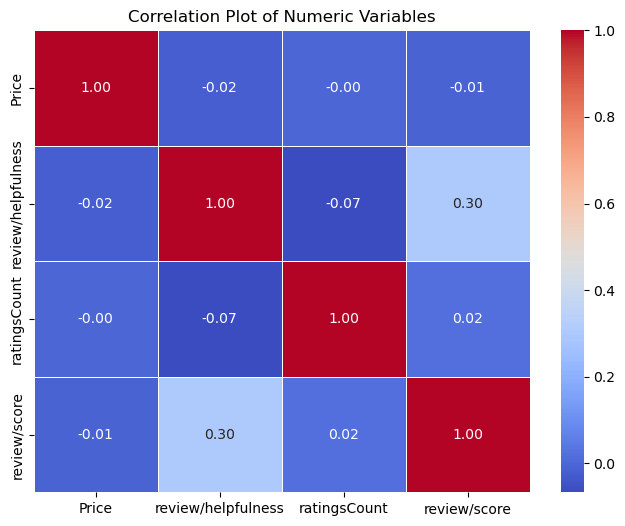

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the correlation matrix for numeric variables
corr_matrix = data[numeric_vars].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Plot of Numeric Variables')
plt.show()

First step, see if we can get some simple models going here to predict ratings based off of the tabular aspect

In [15]:
sample_df = pd.read_csv("books_subset.csv")

In [18]:
tabular_df = sample_df.drop(columns=['description', 'Title', 'image', 'previewLink', 'infoLink', 'Id', 'User_id', 'profileName', 'review/summary', 'review/text', 'publishedDate'])

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split


In [37]:
# tabular_df.head()
tabular_df['review/time'] = pd.to_datetime(tabular_df['review/time'], unit='s')
## Drop all rows where author is NA
tabular_df = tabular_df.dropna(subset=['authors'])
X = tabular_df.drop(columns=['review/score'])
y = tabular_df['review/score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=307)


In [ ]:

categorical_features_kept = ['authors', 'categories', 'publisher']


numeric_features_kept = ['Price', 'review/helpfulness', 'ratingsCount']


# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=307)

# numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')), 
#    # ('poly', PolynomialFeatures(include_bias=False)),
#    ('scaler', StandardScaler())                 
# ])


# categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')), 
#    ('onehot', OneHotEncoder(handle_unknown='ignore')),   
# ])


# preprocessor = ColumnTransformer(transformers=[
#        ('num', numeric_transformer, numeric_features_kept),     
#        ('cat', categorical_transformer, categorical_features_kept) 
#    ])


# pipe = Pipeline(steps=[
#    ('preprocessor', preprocessor)
# ])

pipe_num = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='median')), 
   # ('poly', PolynomialFeatures(include_bias=False)),
   ('scaler', StandardScaler()) 
])

pipe_cat = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent')), 
   ('onehot', OneHotEncoder(handle_unknown='ignore')),   
])

Xpp_num = pipe_num.fit_transform(X_train)
Xpp_num['parsedDate'] = X_train['parsedDate']
Xpp_test['parsedDate'] = X_test['parsedDate']
Xpp['review/time'] = X_train['review/time']
Xpp_test['review/time'] = X_test['review/time']
# Transform x_test now

Xpp_test = pipe_num.transform(Xpp_num)

# 'parsedDate', 'review/time'


IndexError: Index dimension must be 1 or 2

In [45]:
Xpp

<19589x12812 sparse matrix of type '<class 'numpy.float64'>'
	with 117534 stored elements in Compressed Sparse Row format>

In [42]:
treemod = RandomForestRegressor(n_estimators=200,criterion='gini',max_depth=10)
fimmod = treemod.fit(Xpp, y_train)

InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'squared_error', 'friedman_mse', 'poisson'}. Got 'gini' instead.